In [111]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin
from numpy import (linspace, sin, cos, pi)
from numpy.fft import rfft, rfftfreq

# Q - предполагаемая ошибка в центре этого раунда
Q = 0.5
# R - погрешность измерения следующего раунда
R = 0.5
# Accumulated_Error - это оценочная ошибка предыдущего раунда, которая представляется как накопление всех ошибок.
Accumulated_Error = 1
# Начальное старое значение
kalman_adc_old = 0

SCOPE = 50

In [112]:
def kalman(ADC_Value):
    global kalman_adc_old
    global Accumulated_Error

    # Отслеживать, когда новое значение слишком отличается от старого значения
    if (abs(ADC_Value-kalman_adc_old)/SCOPE > 0.25):
        Old_Input = ADC_Value*0.382 + kalman_adc_old*0.618
    else:
        Old_Input = kalman_adc_old

    # Общая ошибка предыдущего раунда = накопленная ошибка ^ 2 + оценочная ошибка ^ 2
    Old_Error_All = (Accumulated_Error**2 + Q**2)**(1/2)

    # R - расчетная ошибка этого раунда
    # H - доверие обеих сторон, рассчитанное с использованием среднеквадратичной ошибки
    H = Old_Error_All**2/(Old_Error_All**2 + R**2)

    # Старое значение + 1.00001 / (1.00001 + 0.1) * (новое значение - старое значение)
    kalman_adc = Old_Input + H * (ADC_Value - Old_Input)

    # Рассчитать новую накопленную ошибку
    Accumulated_Error = ((1 - H)*Old_Error_All**2)**(1/2)
    # Новое значение становится старым значением
    kalman_adc_old = kalman_adc
    return kalman_adc


In [113]:
len_m = 1000
x = linspace(0, len_m, len_m)  # возвращает равномерно распределённые числа в данном интервале

mu, sigma = 0, 1
a0 = 1
a1 = 0.75
a2 = 0.5
w0 = 0.1778012
w1 = 0.16
w2 = 0.02
k = 0.000001

#data_1 = 0.1*(np.random.random(len_m))
#np.exp(-k*x**2)*

# T= 2*pi
f1 = np.exp(-k*x**2)*((a0 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00) + (a1 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00) + (a2 + 0.2*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.00)) + [x for x in 0.25*(np.random.normal(mu, sigma, len_m))]
f2 = np.exp(-k*x**2)*((a0 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.00425) + (a1 + 0.05*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.00425) + (a2 + 0.1*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.025)) + [x for x in 0.3*(np.random.normal(mu, sigma, len_m))]
f3 = np.exp(-k*x**2)*((a0 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.0085) + (a1 + 0.09*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.0085) + (a2 + 0.18*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.0085)) + [x for x in 0.2*(np.random.normal(mu, sigma, len_m))]
f4 = np.exp(-k*x**2)*((a0 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w0 * x + 2 * pi * 0.01275) + (a1 + 0.11*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w1 * x + 2 * pi * 0.01275) + (a2 + 0.22*(np.random.normal(mu, sigma, len_m)))*sin(2 * pi * w2 * x + 2 * pi * 0.01275)) + [x for x in 0.1*(np.random.normal(mu, sigma, len_m))]

Mas = np.c_[f1, f2, f3, f4]

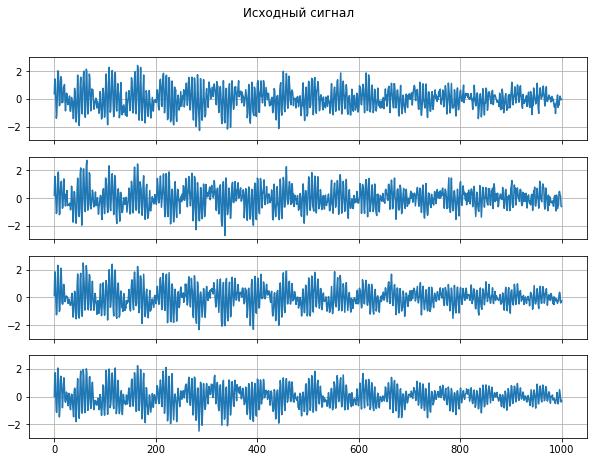

In [114]:
nrows, ncols = 4, 1
figsize = [10, 7]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize, sharex=True, sharey=True)
fig.suptitle('Исходный сигнал')
ax[0].plot(x, f1)
ax[0].grid(True)
ax[1].plot(x, f2)
ax[1].grid(True)
ax[2].plot(x, f3)
ax[2].grid(True)
ax[3].plot(x, f4)
ax[3].grid(True)

plt.show()

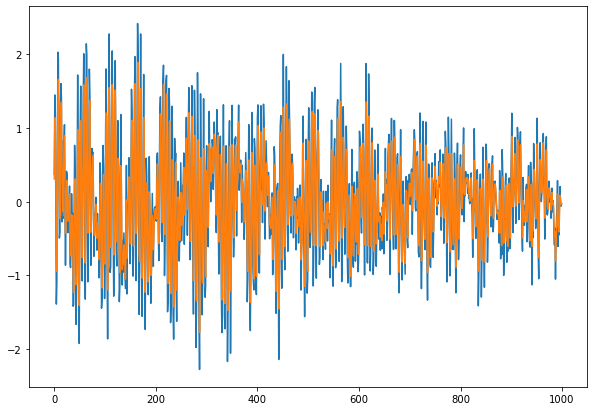

In [115]:
adc=[]
for i in range(len(f1)):
    adc.append(kalman(f1[i]))
    
plt.figure(figsize=figsize)  
plt.plot(f1)   
plt.plot(adc)   

plt.show()

(501,) (501,)
0.178


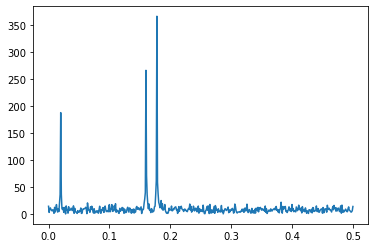

In [116]:
spectrs = rfft(f1)
nu = rfftfreq(len_m, 1.)
print(spectrs.shape, nu.shape)
plt.plot(nu, np.abs(spectrs))
print(nu[np.argmax(np.abs(spectrs), axis=0)])

0.178


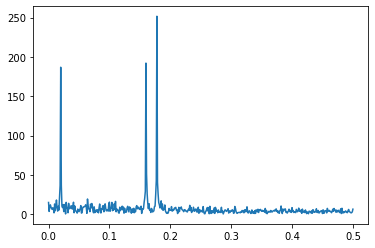

In [117]:
spectrK = rfft(adc)
plt.plot(nu, np.abs(spectrK))
print(nu[np.argmax(np.abs(spectrK), axis=0)])

In [118]:
file = "v2k_bpm_xy_1.sdds"

data = np.loadtxt(file, dtype = float, skiprows = 13, usecols = (1, 2, 3, 4), comments = '#')
print(data.shape)
data_t = data[:,0]
data_x = data[:,1]
print(data_x.shape)

(8189, 4)
(8189,)


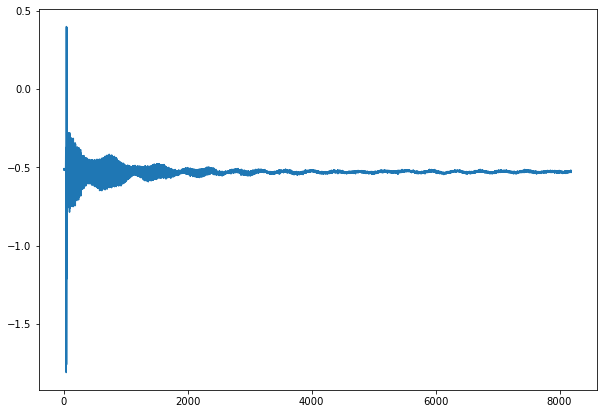

In [119]:
plt.figure(figsize=figsize)  
plt.plot(data_x)      

plt.show()

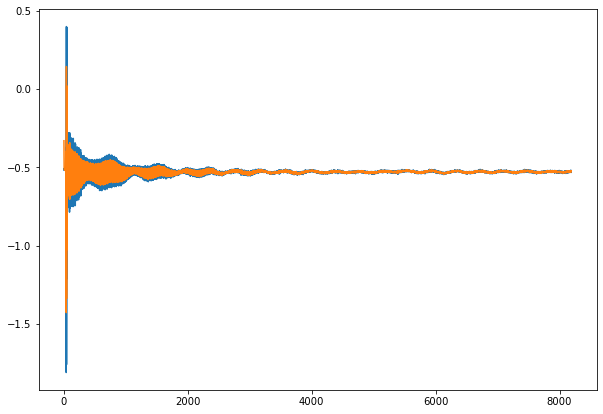

In [120]:
adc_x=[]
for i in range(len(data_x)):
    adc_x.append(kalman(data_x[i]))

plt.figure(figsize=figsize)  
plt.plot(data_x) 
plt.plot(adc_x)

plt.show()

In [121]:
len_X = len(data_t)
print(len_X)

spectr_x = rfft(data_x)
spectr_Kx = rfft(adc_x)
nu_x = rfftfreq(len_X, 1.)
print(nu_x.shape)
print(spectr_Kx.shape)

8189
(4095,)
(4095,)


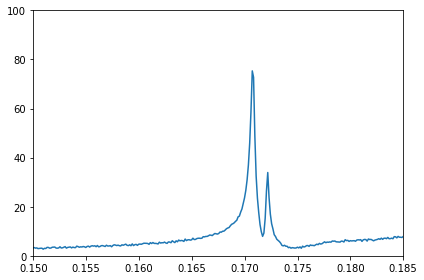

In [122]:
plt.plot(nu_x, np.abs(spectr_x))

axes = plt.gca()
axes.set_xlim([0.15, 0.185])
axes.set_ylim([0, 100])
plt.tight_layout()
plt.show()

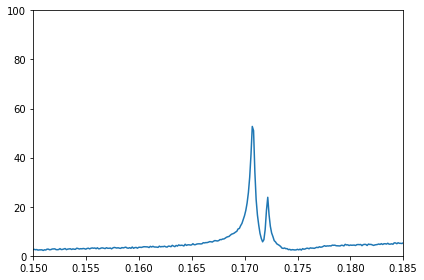

In [123]:
plt.plot(nu_x, np.abs(spectr_Kx))

axes = plt.gca()
axes.set_xlim([0.15, 0.185])
axes.set_ylim([0, 100])
plt.tight_layout()
plt.show()